# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from time import strftime, localtime

# Import API key
api_key = "d47c8f9477347bbfe507da50ec0b80ba"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combinationmm
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [22]:
rep = requests.get(base_url + "london").json() 
print(json.dumps(rep,indent=4))

{
    "coord": {
        "lon": -0.13,
        "lat": 51.51
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10n"
        },
        {
            "id": 701,
            "main": "Mist",
            "description": "mist",
            "icon": "50n"
        },
        {
            "id": 721,
            "main": "Haze",
            "description": "haze",
            "icon": "50n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 47.39,
        "pressure": 1016,
        "humidity": 93,
        "temp_min": 45,
        "temp_max": 48.99
    },
    "visibility": 10000,
    "wind": {
        "speed": 8.05,
        "deg": 330
    },
    "rain": {
        "1h": 0.25
    },
    "clouds": {
        "all": 68
    },
    "dt": 1551411445,
    "sys": {
        "type": 1,
        "id": 1502,
        "message": 0.0095,
        "country": "GB",
        "sunrise": 1551422769,
        "su

In [ ]:
# Remove any rows that did not have data and run a final count to ensure a large enough data table
#final_df = list1_df.loc[list1_df["Temp"] != "FAIL", :]
#print(final_df.count())
#final_df.head()


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
rep = request.get(base_url + "london").json()
print(json.dumps(rep,indent=4))

In [39]:
w_data = {"City":[],
          'Cloudiness':[],
          'Country':[],
          'Date':[],
          'Humidity':[],
          'Lat':[],
          'Lng':[],
          'Max_Temp':[],
          'Wind_Speed':[]}

row_count = 1

base_url=("http://api.openweathermap.org/data/2.5/weather?APPID=" + api_key + "&units=Imperial&q=")

print("Retrieve Data")
print("-"*35)
for city in cities:
    response = requests.get(base_url + city).json()
    if response["cod"] != "404":
        print("Data for City :{}, city_number: {}".format(city,row_count))
        w_data["City"].append(response["name"])
        w_data["Cloudiness"].append(response["clouds"]["all"])
        w_data["Country"].append(response["sys"]["country"])
        w_data["Date"].append(response["dt"])
        w_data["Humidity"].append(response["main"]["humidity"])
        w_data["Lat"].append(response["coord"]["lat"])
        w_data["Lng"].append(response["coord"]["lon"])
        w_data["Max_Temp"].append(response["main"]["temp_max"])
        w_data["Wind_Speed"].append(response["wind"]["speed"])
        row_count += 1
        time.sleep(1.07)
    else:
        print("No data for city: {}".format(city))
        time.sleep(1.07)
print("Done getting data")

        
                                             
                                             
                              
                              
                              
                              
                              
                              
                              

### Convert Raw Data to DataFrame
#* Export the city data into a .csv.
#* Display the DataFrame

Retrieve Data
-----------------------------------
Data for City :new norfolk, city_number: 1
Data for City :rikitea, city_number: 2
Data for City :bethel, city_number: 3
Data for City :albany, city_number: 4
Data for City :ilulissat, city_number: 5
Data for City :pong, city_number: 6
Data for City :kirakira, city_number: 7
Data for City :vagur, city_number: 8
Data for City :vaini, city_number: 9
Data for City :cayenne, city_number: 10
Data for City :coahuayana, city_number: 11
Data for City :east london, city_number: 12
Data for City :constitucion, city_number: 13
No data for city: krasnoselkup
Data for City :hamilton, city_number: 14
Data for City :malanje, city_number: 15
Data for City :matagami, city_number: 16
Data for City :rodbyhavn, city_number: 17
No data for city: mrirt
Data for City :alofi, city_number: 18
Data for City :tabuk, city_number: 19
Data for City :nikolskoye, city_number: 20
Data for City :punta arenas, city_number: 21
Data for City :bredasdorp, city_number: 22
No 

Data for City :calvia, city_number: 183
No data for city: hurghada
Data for City :souillac, city_number: 184
No data for city: meyungs
Data for City :lebu, city_number: 185
No data for city: nizhneyansk
Data for City :kaeo, city_number: 186
Data for City :kolpashevo, city_number: 187
Data for City :tiksi, city_number: 188
Data for City :palauig, city_number: 189
Data for City :west fargo, city_number: 190
Data for City :chicama, city_number: 191
Data for City :eureka, city_number: 192
Data for City :port elizabeth, city_number: 193
Data for City :talnakh, city_number: 194
Data for City :fortuna, city_number: 195
Data for City :lompoc, city_number: 196
No data for city: umzimvubu
Data for City :lagoa, city_number: 197
Data for City :mahebourg, city_number: 198
No data for city: duz
Data for City :panzhihua, city_number: 199
Data for City :codrington, city_number: 200
No data for city: mergui
Data for City :georgetown, city_number: 201
Data for City :grand gaube, city_number: 202
Data fo

Data for City :aldan, city_number: 362
Data for City :sibolga, city_number: 363
Data for City :labuhan, city_number: 364
Data for City :rio gallegos, city_number: 365
Data for City :yenagoa, city_number: 366
Data for City :santa fe, city_number: 367
Data for City :marzuq, city_number: 368
Data for City :rassvet, city_number: 369
Data for City :mogadishu, city_number: 370
Data for City :selma, city_number: 371
Data for City :kindu, city_number: 372
Data for City :north platte, city_number: 373
Data for City :vanino, city_number: 374
Data for City :salta, city_number: 375
Data for City :bridgetown, city_number: 376
Data for City :chapais, city_number: 377
Data for City :chegdomyn, city_number: 378
Data for City :jerome, city_number: 379
Data for City :evensk, city_number: 380
Data for City :vila franca do campo, city_number: 381
Data for City :gigmoto, city_number: 382
Data for City :vila velha, city_number: 383
Data for City :jutai, city_number: 384
Data for City :kem, city_number: 385


No data for city: felidhoo
Data for City :carman, city_number: 542
Data for City :barmer, city_number: 543
No data for city: sataua
No data for city: sakakah
Data for City :luocheng, city_number: 544
Data for City :yashkul, city_number: 545
Data for City :nicolas bravo, city_number: 546
Data for City :mahajanga, city_number: 547
Data for City :namatanai, city_number: 548
Done getting data


In [41]:
weather_df=pd.DataFrame(w_data)
weather_df.to_csv("weather_data.csv","w")

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,New Norfolk,0,AU,1551413536,48,-42.78,147.06,86.00,11.41
1,Rikitea,92,PF,1551413540,100,-23.12,-134.97,76.43,8.77
2,Bethel,40,US,1551412560,80,60.79,-161.76,37.40,12.75
3,Albany,1,US,1551413285,60,42.65,-73.75,17.01,2.28
4,Ilulissat,44,GL,1551408600,85,69.22,-51.10,15.80,2.24


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

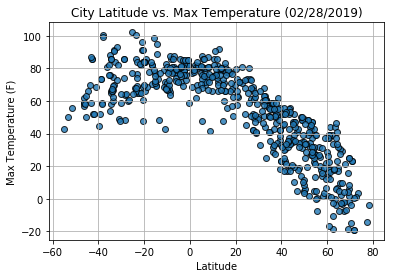

In [44]:
plt.scatter(weather_df["Lat"],weather_df["Max_Temp"],edgecolor="black",alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature ({})".format(strftime("%m/%d/%Y",localtime())))
plt.savefig("City_Lat_vs_Max_Temp.png")

#### Latitude vs. Humidity Plot

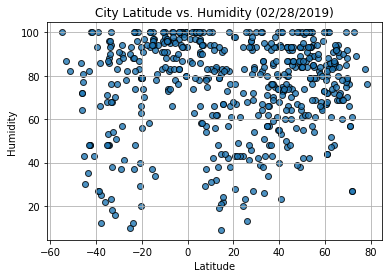

In [46]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolor="black",alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity ({})".format(strftime("%m/%d/%Y",localtime())))
plt.savefig("City_Lat_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

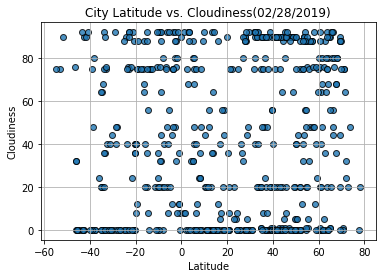

In [47]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolor="black",alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness({})".format(strftime("%m/%d/%Y",localtime())))
plt.savefig("City_Lat_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

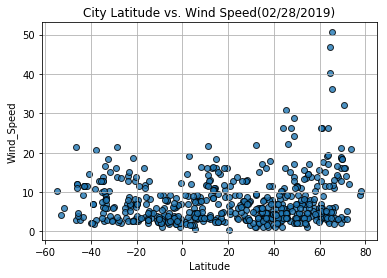

In [48]:
plt.scatter(weather_df["Lat"],weather_df["Wind_Speed"],edgecolor="black",alpha=0.8)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed")
plt.title("City Latitude vs. Wind Speed({})".format(strftime("%m/%d/%Y",localtime())))
plt.savefig("City_Lat_vs_Wind_Speed.png")